# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Import all the required libraries 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#import stopwords and text processing libraries

# Basic EDA on cnbc_headlines dataset

In [3]:
# Read csv file of cnbc headlines using pandas
cnbc = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\ml project\8\cnbc_headlines.csv")

In [4]:
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [5]:
# check the shape of cnbc headline dataset
cnbc.shape

(3080, 3)

In [6]:
# Check all the columns in the cnbc headline dataset
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [7]:
# Check which columns are having categorical, numerical or boolean values
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [8]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [9]:
 # drop nan values in cnbc headline dataset
cnbc.dropna(inplace=True)

In [10]:
# drop the duplicate rows in the dataset keep the first one
cnbc.drop_duplicates(subset=['Headlines','Description'],keep='first',inplace=True)

In [12]:
# check the shape of cnbc headline dataset
cnbc.shape

(2790, 3)

# Basic EDA on Gaurdian headlines dataset

In [13]:
# Read csv file of gaurdian headlines using pandas
gr = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\ml project\8\guardian_headlines.csv")

In [14]:
gr.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [15]:
#check the shape of gaurdian headline dataset
gr.shape

(17800, 2)

In [16]:
#check columns of gaurdian headline
gr.columns

Index(['Time', 'Headlines'], dtype='object')

In [17]:
# Check which columns are having categorical, numerical or boolean values
gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [18]:
# check null values in gaurdian headlines dataset
gr.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [19]:
# drop duplicate rows in headlines and keep the first one
gr.drop_duplicates(subset=['Headlines'],keep='first',inplace=True)

In [20]:
gr

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


# Basic EDA on reuters headlines

In [21]:
# Read csv file of reuters headlines using using pandas
rt = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\ml project\8\reuters_headlines.csv")

In [22]:
rt.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [24]:
#check the shape of reuters headlines dataset
rt.shape

(32770, 3)

In [25]:
#check the columns of reuters headline dataset
rt.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [26]:
# Check which columns are having categorical, numerical or boolean values
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [27]:
# Check for missing values in all the columnns of reuters headlines dataset
rt.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [28]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
rt.drop_duplicates(subset=['Headlines','Description'],keep='first',inplace=True)

In [29]:
rt

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [43]:
# create a function for preprocessing 
def preprocessing(text):
    
  #convert all to lowercase
    text = text.lower()
  #remove puntuations
    text = re.sub(r'[^\w\s]','',text)
    
    text = nltk.word_tokenize(text)

  #remove stopword
    text = [word for word in text if not word in stopwords.words('english')]

  #stemming
    text = [PorterStemmer().stem(w) for w in text]


  #lemmitizing
    text = [WordNetLemmatizer().lemmatize(w) for w in text]
    
    text = ' '.join(text)
    return text

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [31]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
analyzer = SentimentIntensityAnalyzer()


In [32]:
#fuction to  decide sentiment as positive, negative and neutral
def score(score):
    if score>0.00:
        return 'positve'
    elif score < 0.0:
        return 'negative'
    else:
        return 'neutral'

# Now working with description on datasets

In [33]:
# concatenate cnbc headlines dataset and reuters headline dataset
d = pd.concat([cnbc, rt],axis=0)

In [34]:
#check the shape of this new dataset
d.shape

(35463, 3)

In [35]:
#make a copy of new dataset 
df = d.copy()

In [44]:
# apply preprocessing to the description of new dataset

df['Description'] = df['Description'].apply(preprocessing)

In [46]:
# analyze polarity score of values in description and  add new column of it in dataset
ds_score = []
for value  in df['Description'].values:
    ds_score.append(analyzer.polarity_scores(value)['compound'])
    
df['ds_score'] = ds_score

In [47]:
# apply the function  which decides sentiment to  polarity score column
df['ds_score'] = df['ds_score'].apply(score)

C:\Users\Roshan Salunke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ds_score', ylabel='count'>

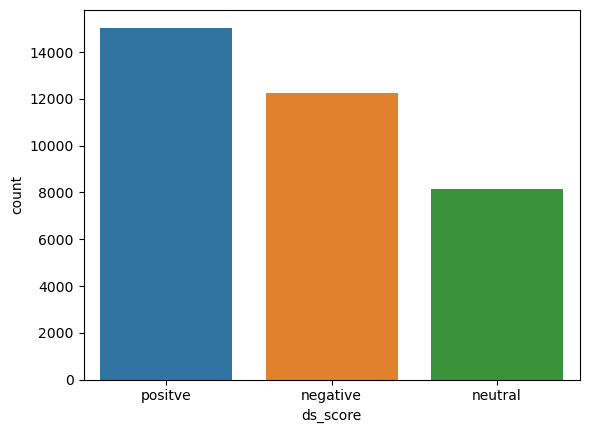

In [48]:
# plot a count plot on description score column
sns.countplot(df['ds_score'])

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

([<matplotlib.patches.Wedge at 0x15e78397550>,
 [Text(0.25904212447606273, 1.069063692090854, 'positive'),
  Text(-0.901323364481665, -0.6305681506700541, 'negative'),
  Text(0.825089304041339, -0.7274803367490967, 'neutral')])

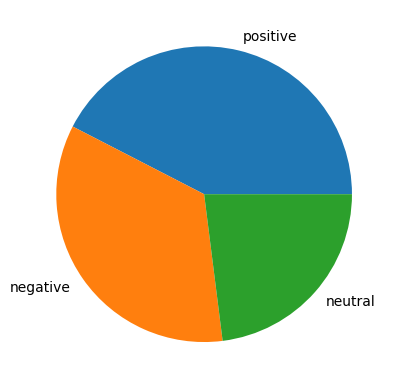

In [49]:
# pie chart on description score column
plt.pie(df['ds_score'].value_counts(),labels=['positive','negative','neutral'])

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [50]:
# split the dataset  into test and train 
# 80% train , 20% test and random state 212
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Description'], df['ds_score'],test_size=0.2)

LINEAR SUPPORT VECTOR MACHINE


In [56]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
from sklearn.svm import LinearSVC
pipe = Pipeline([('tf', TfidfVectorizer()),
                ('model', LinearSVC())])


# Fit the pipeline to the data
pipe.fit(x_train, y_train)
# predict on test dataset
pred = pipe.predict(x_test)
# print accuracy score
print(accuracy_score(pred, y_test))
#print confusion matrix
print(confusion_matrix(pred, y_test))
#print classification report
print(classification_report(pred, y_test))

0.9255604116734809
[[2291   55  120]
 [ 100 1486   69]
 [ 130   54 2788]]
              precision    recall  f1-score   support

    negative       0.91      0.93      0.92      2466
     neutral       0.93      0.90      0.91      1655
     positve       0.94      0.94      0.94      2972

    accuracy                           0.93      7093
   macro avg       0.93      0.92      0.92      7093
weighted avg       0.93      0.93      0.93      7093

CPU times: total: 2.53 s
Wall time: 2.68 s


In [57]:
def metrix(pred, y_test):
    print(f'acc: {accuracy_score(y_test, pred)}')
    print(f'confusion: {confusion_matrix(y_test, pred)}')
    print(f'classification: {classification_report(y_test,pred)}')

In [59]:
def pipe(model):
    pipeline = Pipeline(steps=[('cv', CountVectorizer()),
                               ('tf', TfidfTransformer()),
                          ('Lsvc', model)])
    pipeline.fit(x_train,y_train)
    pred = pipeline.predict(x_test)
    
    return metrix(pred, y_test)

LOGISTIC REGRESSION


In [62]:
%%time
from sklearn.linear_model import LogisticRegression
pipe(LogisticRegression())

C:\Users\Roshan Salunke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc: 0.8891865219230227
confusion: [[2178  147  196]
 [  99 1403   93]
 [ 156   95 2726]]
classification:               precision    recall  f1-score   support

    negative       0.90      0.86      0.88      2521
     neutral       0.85      0.88      0.87      1595
     positve       0.90      0.92      0.91      2977

    accuracy                           0.89      7093
   macro avg       0.88      0.89      0.89      7093
weighted avg       0.89      0.89      0.89      7093

CPU times: total: 16.4 s
Wall time: 4.73 s


MULTINOMIAL NAIVE BAYES


In [63]:
%%time
from sklearn.naive_bayes import MultinomialNB
pipe(MultinomialNB())
 

acc: 0.6330184689130128
confusion: [[1588   10  923]
 [ 277  197 1121]
 [ 262   10 2705]]
classification:               precision    recall  f1-score   support

    negative       0.75      0.63      0.68      2521
     neutral       0.91      0.12      0.22      1595
     positve       0.57      0.91      0.70      2977

    accuracy                           0.63      7093
   macro avg       0.74      0.55      0.53      7093
weighted avg       0.71      0.63      0.59      7093

CPU times: total: 1.42 s
Wall time: 1.53 s


BERNOULLI NAIVE BAYES


In [64]:
%%time
from sklearn.naive_bayes import BernoulliNB
pipe(BernoulliNB())


acc: 0.7342450303115748
confusion: [[1829  130  562]
 [ 235  988  372]
 [ 446  140 2391]]
classification:               precision    recall  f1-score   support

    negative       0.73      0.73      0.73      2521
     neutral       0.79      0.62      0.69      1595
     positve       0.72      0.80      0.76      2977

    accuracy                           0.73      7093
   macro avg       0.74      0.72      0.73      7093
weighted avg       0.74      0.73      0.73      7093

CPU times: total: 1.44 s
Wall time: 1.58 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [68]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
pipe(GradientBoostingClassifier())

acc: 0.8346256872973354
confusion: [[1827  346  348]
 [  16 1560   19]
 [ 163  281 2533]]
classification:               precision    recall  f1-score   support

    negative       0.91      0.72      0.81      2521
     neutral       0.71      0.98      0.82      1595
     positve       0.87      0.85      0.86      2977

    accuracy                           0.83      7093
   macro avg       0.83      0.85      0.83      7093
weighted avg       0.85      0.83      0.83      7093

CPU times: total: 1min 26s
Wall time: 1min 26s


DECISION TREE CLASSIFICATION MODEL


In [70]:
%%time
from sklearn.tree import DecisionTreeClassifier
pipe(DecisionTreeClassifier())


acc: 0.8662061187085859
confusion: [[2033   45  443]
 [  19 1553   23]
 [ 385   34 2558]]
classification:               precision    recall  f1-score   support

    negative       0.83      0.81      0.82      2521
     neutral       0.95      0.97      0.96      1595
     positve       0.85      0.86      0.85      2977

    accuracy                           0.87      7093
   macro avg       0.88      0.88      0.88      7093
weighted avg       0.87      0.87      0.87      7093

CPU times: total: 22.2 s
Wall time: 22.7 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [71]:
%%time
from sklearn.neighbors import KNeighborsClassifier
pipe(KNeighborsClassifier())


acc: 0.5495559001832793
confusion: [[1590  350  581]
 [ 462  661  472]
 [ 787  543 1647]]
classification:               precision    recall  f1-score   support

    negative       0.56      0.63      0.59      2521
     neutral       0.43      0.41      0.42      1595
     positve       0.61      0.55      0.58      2977

    accuracy                           0.55      7093
   macro avg       0.53      0.53      0.53      7093
weighted avg       0.55      0.55      0.55      7093

CPU times: total: 10.8 s
Wall time: 11.7 s


# working with test dataset

In [74]:

pipeline = Pipeline(steps=[('cv', CountVectorizer()),
                           ('tf', TfidfTransformer()),
                      ('Lsvc', LinearSVC())])
pipeline.fit(x_train,y_train)
pred = pipeline.predict(x_test)

In [75]:
# creating a dataframe of predicted results 
pred = pd.DataFrame(pred)

In [77]:
pred

,0
0,negative
1,negative
2,positve
3,positve
4,negative
...,...
7088,negative
7089,neutral
7090,positve
7091,negative


# Now working with headlines + description

In [79]:
# merge headlines and description of new dataset and name it info
df['info'] = df['Headlines'] + df['Description']
df.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,positve,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,negative,Cramer's lightning round: I would own Teradyne...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,positve,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,positve,IQ Capital CEO Keith Bliss says tech and healt...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,negative,Wall Street delivered the 'kind of pullback I'...


In [80]:
# only keep info and time column . drop all remaining columns
df = df[['Headlines', 'info']]
df.head()

,Headlines,info
0,Jim Cramer: A better way to invest in the Covi...,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,Cramer's lightning round: I would own Teradyne...
3,"Cramer's week ahead: Big week for earnings, ev...","Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...,IQ Capital CEO Keith Bliss says tech and healt...
5,Wall Street delivered the 'kind of pullback I'...,Wall Street delivered the 'kind of pullback I'...


In [82]:
# apply preprocessing on info column
df['info'] = df['info'].apply(preprocessing)

C:\Users\Roshan Salunke\AppData\Local\Temp\ipykernel_13652\2689080011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['info'] = df['info'].apply(preprocessing)


In [83]:
# analyze polarity score of values in info and  add new column of it in dataset
info_score = []
for value in df['info'].values:
    info_score.append(analyzer.polarity_scores(value)['compound'])
df['info_score'] = info_score

C:\Users\Roshan Salunke\AppData\Local\Temp\ipykernel_13652\1485071660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['info_score'] = info_score


In [84]:
# apply the function  which decides sentiment to  polarity score column
df['info_score'] = df['info_score'].apply(score)

C:\Users\Roshan Salunke\AppData\Local\Temp\ipykernel_13652\786168046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['info_score'] = df['info_score'].apply(score)


C:\Users\Roshan Salunke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

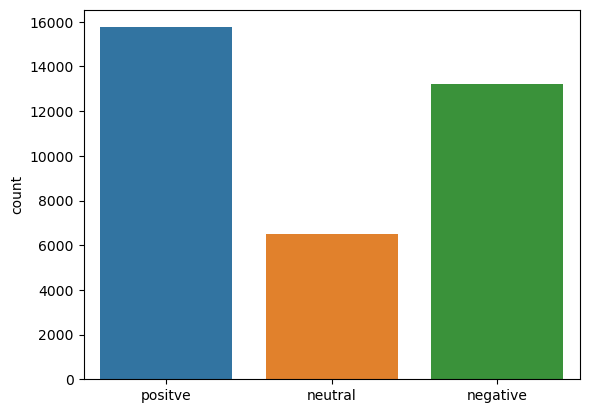

In [85]:
# perform count plot on info_score column
sns.countplot(df['info_score'].values)

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

([<matplotlib.patches.Wedge at 0x15e0701fc10>,
 [Text(0.19171673043556015, 1.0831642051282433, 'positive'),
  Text(-0.7500402336737688, -0.8046363451091421, 'neutral'),
  Text(0.9230441349659064, -0.5983222584068234, 'negative')])

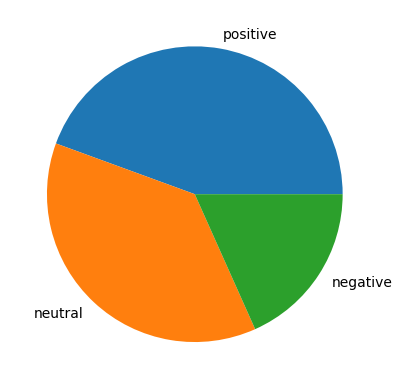

In [89]:
# perform pie chart on info_score column
plt.pie(df['info_score'].value_counts(), labels=['positive','neutral','negative'])

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [90]:
# split the dataset  into test and train 
# 80% train , 20% test and random state 212
x_train, x_test, y_train, y_test = train_test_split(df['info'],df['info_score'],test_size=0.2)

LINEAR SUPPORT VECTOR MACHINE


In [91]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
from sklearn.svm import LinearSVC
pipe = Pipeline([('tf', TfidfVectorizer()),
                ('model', LinearSVC())])


# Fit the pipeline to the data
pipe.fit(x_train, y_train)
# predict on test dataset
pred = pipe.predict(x_test)
# print accuracy score
print(accuracy_score(pred, y_test))
#print confusion matrix
print(confusion_matrix(pred, y_test))
#print classification report
print(classification_report(pred, y_test))

0.8872127449598195
[[2322   99  164]
 [ 124 1080  100]
 [ 170  143 2891]]
              precision    recall  f1-score   support

    negative       0.89      0.90      0.89      2585
     neutral       0.82      0.83      0.82      1304
     positve       0.92      0.90      0.91      3204

    accuracy                           0.89      7093
   macro avg       0.87      0.88      0.87      7093
weighted avg       0.89      0.89      0.89      7093

CPU times: total: 2.86 s
Wall time: 2.93 s


In [93]:
def pipe(model):
    pipeline = Pipeline(steps=[('cv', CountVectorizer()),
                               ('tf', TfidfTransformer()),
                          ('Lsvc', model)])
    pipeline.fit(x_train,y_train)
    pred = pipeline.predict(x_test)
    
    return metrix(pred, y_test)

LOGISTIC REGRESSION


In [94]:
%%time
pipe(LogisticRegression())
 

C:\Users\Roshan Salunke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc: 0.8509798392781616
confusion: [[2245  132  239]
 [ 160  928  234]
 [ 208   84 2863]]
classification:               precision    recall  f1-score   support

    negative       0.86      0.86      0.86      2616
     neutral       0.81      0.70      0.75      1322
     positve       0.86      0.91      0.88      3155

    accuracy                           0.85      7093
   macro avg       0.84      0.82      0.83      7093
weighted avg       0.85      0.85      0.85      7093

CPU times: total: 25.1 s
Wall time: 7.6 s


MULTINOMIAL NAIVE BAYES


In [95]:
%%time
pipe(MultinomialNB())
 

acc: 0.6328774848442126
confusion: [[1590    2 1024]
 [ 284   17 1021]
 [ 273    0 2882]]
classification:               precision    recall  f1-score   support

    negative       0.74      0.61      0.67      2616
     neutral       0.89      0.01      0.03      1322
     positve       0.58      0.91      0.71      3155

    accuracy                           0.63      7093
   macro avg       0.74      0.51      0.47      7093
weighted avg       0.70      0.63      0.57      7093

CPU times: total: 1.81 s
Wall time: 1.95 s


BERNOULLI NAIVE BAYES


In [96]:
%%time
pipe(BernoulliNB())
 

acc: 0.6844776540250952
confusion: [[1923   23  670]
 [ 378  292  652]
 [ 493   22 2640]]
classification:               precision    recall  f1-score   support

    negative       0.69      0.74      0.71      2616
     neutral       0.87      0.22      0.35      1322
     positve       0.67      0.84      0.74      3155

    accuracy                           0.68      7093
   macro avg       0.74      0.60      0.60      7093
weighted avg       0.71      0.68      0.66      7093

CPU times: total: 1.86 s
Wall time: 2.02 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [97]:
%%time
pipe(GradientBoostingClassifier())
 

acc: 0.71873678274355
confusion: [[1914   42  660]
 [  14  283 1025]
 [ 218   36 2901]]
classification:               precision    recall  f1-score   support

    negative       0.89      0.73      0.80      2616
     neutral       0.78      0.21      0.34      1322
     positve       0.63      0.92      0.75      3155

    accuracy                           0.72      7093
   macro avg       0.77      0.62      0.63      7093
weighted avg       0.76      0.72      0.69      7093

CPU times: total: 1min 45s
Wall time: 1min 46s


DECISION TREE CLASSIFICATION MODEL


In [98]:
%%time
pipe(DecisionTreeClassifier())


acc: 0.8346256872973354
confusion: [[2060   75  481]
 [  38 1240   44]
 [ 487   48 2620]]
classification:               precision    recall  f1-score   support

    negative       0.80      0.79      0.79      2616
     neutral       0.91      0.94      0.92      1322
     positve       0.83      0.83      0.83      3155

    accuracy                           0.83      7093
   macro avg       0.85      0.85      0.85      7093
weighted avg       0.83      0.83      0.83      7093

CPU times: total: 25 s
Wall time: 25.6 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [99]:
%%time
pipe(KNeighborsClassifier())

acc: 0.555618215141689
confusion: [[1681  244  691]
 [ 495  386  441]
 [ 879  402 1874]]
classification:               precision    recall  f1-score   support

    negative       0.55      0.64      0.59      2616
     neutral       0.37      0.29      0.33      1322
     positve       0.62      0.59      0.61      3155

    accuracy                           0.56      7093
   macro avg       0.52      0.51      0.51      7093
weighted avg       0.55      0.56      0.55      7093

CPU times: total: 11.7 s
Wall time: 12.1 s


# working with test data

In [101]:
%%time
# Perforn the prediction on the test dataset


# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
from sklearn.svm import LinearSVC
pipe = Pipeline([('tf', TfidfVectorizer()),
                ('model', LinearSVC())])


# Fit the pipeline to the data
pipe.fit(x_train, y_train)
# predict on test dataset
pred = pipe.predict(x_test)
# print accuracy score
print(accuracy_score(pred, y_test))
#print confusion matrix
print(confusion_matrix(pred, y_test))
#print classification report
print(classification_report(pred, y_test))

0.8872127449598195
[[2322   99  164]
 [ 124 1080  100]
 [ 170  143 2891]]
              precision    recall  f1-score   support

    negative       0.89      0.90      0.89      2585
     neutral       0.82      0.83      0.82      1304
     positve       0.92      0.90      0.91      3204

    accuracy                           0.89      7093
   macro avg       0.87      0.88      0.87      7093
weighted avg       0.89      0.89      0.89      7093

CPU times: total: 2.86 s
Wall time: 2.96 s


In [102]:
# creating a dataframe of predicted results 
pred = pd.DataFrame(pred)

In [103]:
pred

,0
0,neutral
1,positve
2,positve
3,negative
4,negative
...,...
7088,negative
7089,positve
7090,positve
7091,negative


# now working on headlines

In [107]:
# from the dataset you have copied before delete the column of description
d.drop('Description',axis=1,inplace=True)

In [109]:
# remane the date column in gaurdian headlines dataset  to time
d.rename(columns={'date': 'Time'},inplace=True)

In [112]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
df = pd.concat([gr,d],axis=0)

In [113]:
df.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [114]:
# check the shape of all headlines dataset
df.shape

(53258, 2)

In [116]:
#apply preprocessin to the headlines column in the new dataset
df['Headlines'] = df['Headlines'].apply(preprocessing)

In [117]:
# analyze polarity score of values in headlines and  add new column of it in dataset
hi_score = []
for value in df['Headlines'].values:
    hi_score.append(analyzer.polarity_scores(value)['compound'])
    
df['hi_score'] = hi_score

In [118]:
# apply the function  which decides sentiment to  polarity score column
df['hi_score'] = df['hi_score'].apply(score)

In [119]:
df.head()

,Time,Headlines,hi_score
0,18-Jul-20,johnson ask santa christma recoveri,neutral
1,18-Jul-20,fear worst four grim tale work life upend covid19,negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,neutral
3,18-Jul-20,covid19 leav firm fatal illprepar nodeal brexit,negative
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...,negative


<AxesSubplot:xlabel='hi_score', ylabel='count'>

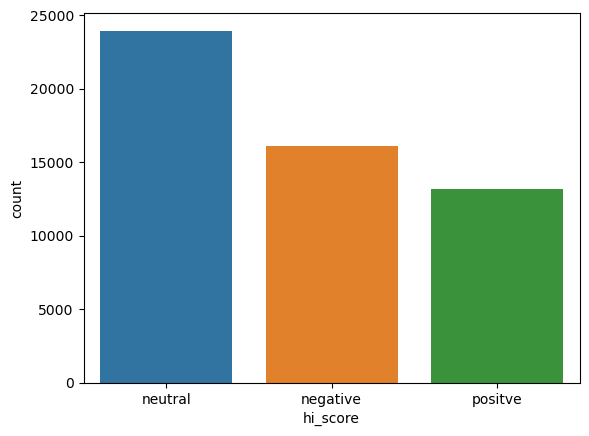

In [122]:
#perform countplot on headline score column
sns.countplot(x=df['hi_score'])

In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

([<matplotlib.patches.Wedge at 0x15e0cb8a7c0>,
 [Text(0.17253293722606433, 1.0863850079838855, 'neutral'),
  Text(-0.8859969876512348, -0.65192740230254, 'negative'),
  Text(0.7828252898257008, -0.7727771772052457, 'positive')])

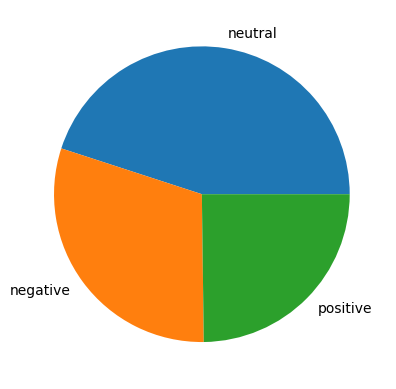

In [123]:
#perform pie digram on headline score column
plt.pie(df['hi_score'].value_counts(),labels=['neutral','negative','positive'])

In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [124]:
# split the dataset  into test and train 
# 80% train , 20% test and random state 212
x_train, x_test, y_train, y_test = train_test_split(df['Headlines'], df['hi_score'],test_size=0.2)

LINEAR SUPPORT VECTOR MACHINE

In [126]:
%%time
from sklearn.svm import LinearSVC
pipe = Pipeline([('tf', TfidfVectorizer()),
                ('model', LinearSVC())])


# Fit the pipeline to the data
pipe.fit(x_train, y_train)
# predict on test dataset
pred = pipe.predict(x_test)
# print accuracy score
print(accuracy_score(pred, y_test))
#print confusion matrix
print(confusion_matrix(pred, y_test))
#print classification report
print(classification_report(pred, y_test))


0.9718362748779572
[[3013   12   86]
 [  66 4871   39]
 [  85   12 2468]]
              precision    recall  f1-score   support

    negative       0.95      0.97      0.96      3111
     neutral       1.00      0.98      0.99      4976
     positve       0.95      0.96      0.96      2565

    accuracy                           0.97     10652
   macro avg       0.97      0.97      0.97     10652
weighted avg       0.97      0.97      0.97     10652

CPU times: total: 2.27 s
Wall time: 2.43 s


In [127]:
def pipe(model):
    pipeline = Pipeline(steps=[('cv', CountVectorizer()),
                               ('tf', TfidfTransformer()),
                          ('Lsvc', model)])
    pipeline.fit(x_train,y_train)
    pred = pipeline.predict(x_test)
    
    return metrix(pred, y_test)

LOGISTIC REGRESSION

In [128]:
%%time
pipe(LogisticRegression())


C:\Users\Roshan Salunke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc: 0.9352234322193015
confusion: [[2813  241  110]
 [   9 4871   15]
 [ 108  207 2278]]
classification:               precision    recall  f1-score   support

    negative       0.96      0.89      0.92      3164
     neutral       0.92      1.00      0.95      4895
     positve       0.95      0.88      0.91      2593

    accuracy                           0.94     10652
   macro avg       0.94      0.92      0.93     10652
weighted avg       0.94      0.94      0.93     10652

CPU times: total: 16.5 s
Wall time: 4.71 s


MULTINOMIAL NAIVE BAYES


In [129]:
%%time
pipe(MultinomialNB())


acc: 0.8376830642132933
confusion: [[2625  387  152]
 [ 158 4693   44]
 [ 408  580 1605]]
classification:               precision    recall  f1-score   support

    negative       0.82      0.83      0.83      3164
     neutral       0.83      0.96      0.89      4895
     positve       0.89      0.62      0.73      2593

    accuracy                           0.84     10652
   macro avg       0.85      0.80      0.82     10652
weighted avg       0.84      0.84      0.83     10652

CPU times: total: 1.17 s
Wall time: 1.25 s


BERNOULLI NAIVE BAYES


In [130]:
%%time
pipe(BernoulliNB())



acc: 0.8799286518963575
confusion: [[2784  113  267]
 [ 300 4439  156]
 [ 325  118 2150]]
classification:               precision    recall  f1-score   support

    negative       0.82      0.88      0.85      3164
     neutral       0.95      0.91      0.93      4895
     positve       0.84      0.83      0.83      2593

    accuracy                           0.88     10652
   macro avg       0.87      0.87      0.87     10652
weighted avg       0.88      0.88      0.88     10652

CPU times: total: 1.22 s
Wall time: 1.29 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [131]:
%%time
pipe(GradientBoostingClassifier())


acc: 0.7904618850920015
confusion: [[1960 1051  153]
 [   8 4877   10]
 [ 127  883 1583]]
classification:               precision    recall  f1-score   support

    negative       0.94      0.62      0.75      3164
     neutral       0.72      1.00      0.83      4895
     positve       0.91      0.61      0.73      2593

    accuracy                           0.79     10652
   macro avg       0.85      0.74      0.77     10652
weighted avg       0.83      0.79      0.78     10652

CPU times: total: 53.5 s
Wall time: 54.2 s


DECISION TREE CLASSIFICATION MODEL


In [132]:
%%time
pipe(DecisionTreeClassifier())


acc: 0.9509951182876455
confusion: [[2926   41  197]
 [  14 4869   12]
 [ 241   17 2335]]
classification:               precision    recall  f1-score   support

    negative       0.92      0.92      0.92      3164
     neutral       0.99      0.99      0.99      4895
     positve       0.92      0.90      0.91      2593

    accuracy                           0.95     10652
   macro avg       0.94      0.94      0.94     10652
weighted avg       0.95      0.95      0.95     10652

CPU times: total: 21.7 s
Wall time: 22 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [133]:
%%time
pipe(KNeighborsClassifier())



acc: 0.600638377769433
confusion: [[1884 1020  260]
 [1060 3508  327]
 [ 551 1036 1006]]
classification:               precision    recall  f1-score   support

    negative       0.54      0.60      0.57      3164
     neutral       0.63      0.72      0.67      4895
     positve       0.63      0.39      0.48      2593

    accuracy                           0.60     10652
   macro avg       0.60      0.57      0.57     10652
weighted avg       0.60      0.60      0.59     10652

CPU times: total: 15.4 s
Wall time: 16.2 s


# now working with test data

In [135]:
# Perforn the prediction on the test dataset
from sklearn.svm import LinearSVC
pipe = Pipeline([('tf', TfidfVectorizer()),
                ('model', LinearSVC())])


# Fit the pipeline to the data
pipe.fit(x_train, y_train)
# predict on test dataset
pred = pipe.predict(x_test)
# print accuracy score
print(accuracy_score(pred, y_test))
#print confusion matrix
print(confusion_matrix(pred, y_test))
#print classification report
print(classification_report(pred, y_test))

0.9718362748779572
[[3013   12   86]
 [  66 4871   39]
 [  85   12 2468]]
              precision    recall  f1-score   support

    negative       0.95      0.97      0.96      3111
     neutral       1.00      0.98      0.99      4976
     positve       0.95      0.96      0.96      2565

    accuracy                           0.97     10652
   macro avg       0.97      0.97      0.97     10652
weighted avg       0.97      0.97      0.97     10652



In [136]:
# creating a dataframe of predicted results 
pred = pd.DataFrame(pred)

In [137]:
pred

,0
0,neutral
1,positve
2,negative
3,negative
4,negative
...,...
10647,positve
10648,negative
10649,positve
10650,neutral


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [138]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = pipe.predict(sent1)
y_predict

array(['negative'], dtype=object)

In [139]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = pipe.predict(sent2)
y_predict

array(['positve'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate
